**<h2>QUESTION/ BUSINESS PROBLEM:</h2>**

Patient readmission to hospitals within a short period after discharge is a significant concern, leading to increased healthcare costs and resource utilization.we  want to predict which patients are at high risk of readmission so that we can provide targeted interventions and follow-up care to reduce readmission rates.

**<h2>DATA SCIENCE PROBLEM</h2>**

Predict the likelihood of a patient being readmitted to the hospital within 30 days.

**0. THE DATASET**

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. 

**0.1. DATA DICTIONARY**

* "age" - age bracket of the patient
* "time_in_hospital" - days (from 1 to 14)
* "n_procedures" - number of procedures performed during the hospital stay
* "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
* "n_medications" - number of medications administered during the hospital stay
* "n_outpatient" - number of outpatient visits in the year before a hospital stay
* "n_inpatient" - number of inpatient visits in the year before the hospital stay
* "n_emergency" - number of visits to the emergency room in the year before the hospital stay
* "medical_specialty" - the specialty of the admitting physician
* "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
* "diag_2" - secondary diagnosis
* "diag_3" - additional secondary diagnosis
* "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
* "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
* "change" - whether there was a change in the diabetes medication ('yes' or 'no')
* "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
* "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')


**<h3>1.DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS</h3>**

In [36]:
#importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline

In [37]:
#Loading the file
filepath = "/Users/tresornoel/Downloads/hospital_readmissions.csv"
df = pd.read_csv(filepath)

In [40]:
#checking the dataset head
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
#checking the tail
df.tail()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no
24999,[50-60),10,37,1,24,0,0,0,Missing,Other,Diabetes,Circulatory,no,no,no,no,yes


In [5]:
#checking info, shape and data types

print(df.info())
print()
print(f'Dataset shape : {df.shape}')
print()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [8]:
#Statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,25000.0,4.45332,3.001470,1.0,2.0,4.0,6.0,14.0
n_lab_procedures,25000.0,43.24076,19.818620,1.0,31.0,44.0,57.0,113.0
n_procedures,25000.0,1.35236,1.715179,0.0,0.0,1.0,2.0,6.0
n_medications,25000.0,16.25240,8.060532,1.0,11.0,15.0,20.0,79.0
n_outpatient,25000.0,0.36640,1.195478,0.0,0.0,0.0,0.0,33.0
n_inpatient,25000.0,0.61596,1.177951,0.0,0.0,0.0,1.0,15.0
n_emergency,25000.0,0.18660,0.885873,0.0,0.0,0.0,0.0,64.0


In [9]:
#Checking missing values
print(df.isnull().sum())

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


**1.1.Plotting histograms** 

Plotting histogram to have an overview of the data distribution

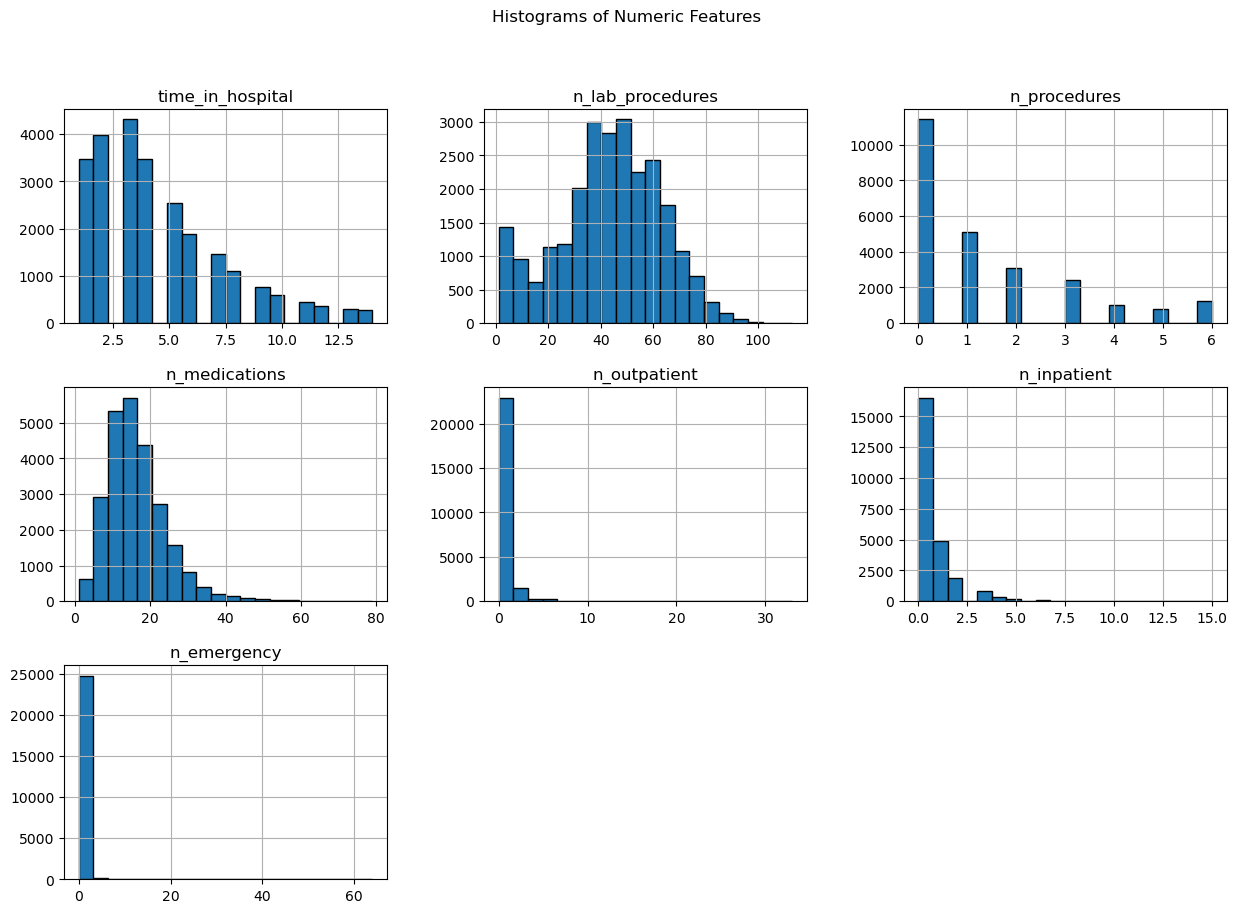

In [10]:
df.hist(bins=20, edgecolor = 'black',figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

Analysing the distribution of the numerical values we can see thet the features n_medications, n_outpatient, n_inpatient and n_emergency are skewed to the right this may be indicating that these features have some outliers.<br>
and most patients spent around 3-4 days in hhospital.

**Plotting boxplots**

By plotting the boxplots we can highlight outliers in different features and check the distribution of numerical values

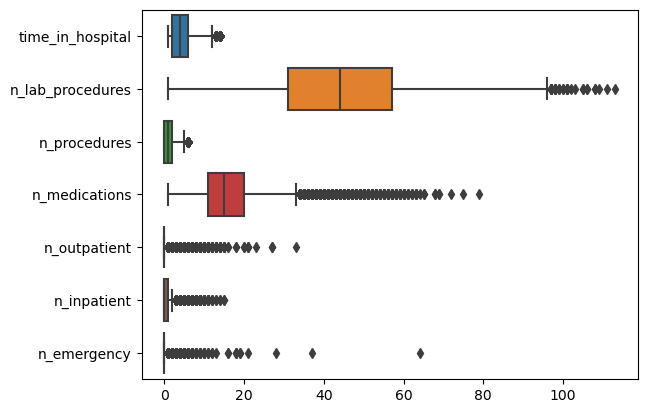

In [10]:
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), orient='h')
plt.savefig('boxplot', dpi=300)
plt.show()

**1.2 Plot pie chart to check categorical features distibution**

Checking the distribution of the categorical features

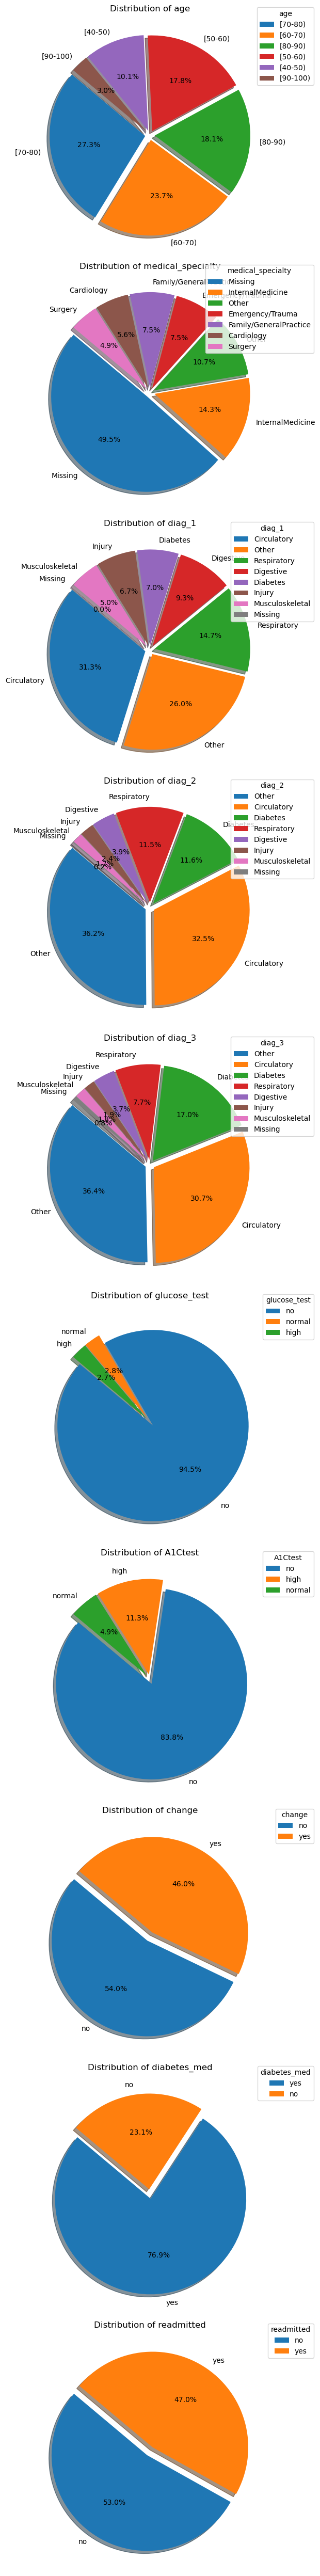

In [11]:

#categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Plot pie charts for each categorical feature
plt.figure(figsize=(15, len(categorical_features) * 5))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    category_counts = df[feature].value_counts()
    
    #explode array to slightly pull out each slice
    explode = [0.05] * len(category_counts)
    
    # pie chart with shadow and explode for a cylindrical effect
    plt.pie(
        category_counts.values, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=140,
        explode=explode,
        shadow=True  # 3D effect
    )
    
    # legend
    plt.legend(category_counts.index, title=feature, loc="upper right", bbox_to_anchor=(1.2, 1.05))
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

The age distribution is quite uniform  accross different age groups with most patients being in the 70-80 age range,<br>most patients are primarly diagnosed with circulatory diseases,<br> most of the patients did not get glucose test and A1Ctest,<br> we can also see that most of our patients were taking diabetes medication,<br>lastly looking at the readmitted feature (taget ) we can see that the distribution is kind of balanced, as most of the models are sensitive to imbalanced target features 

**1.3.Pairplot and heatmap**

/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

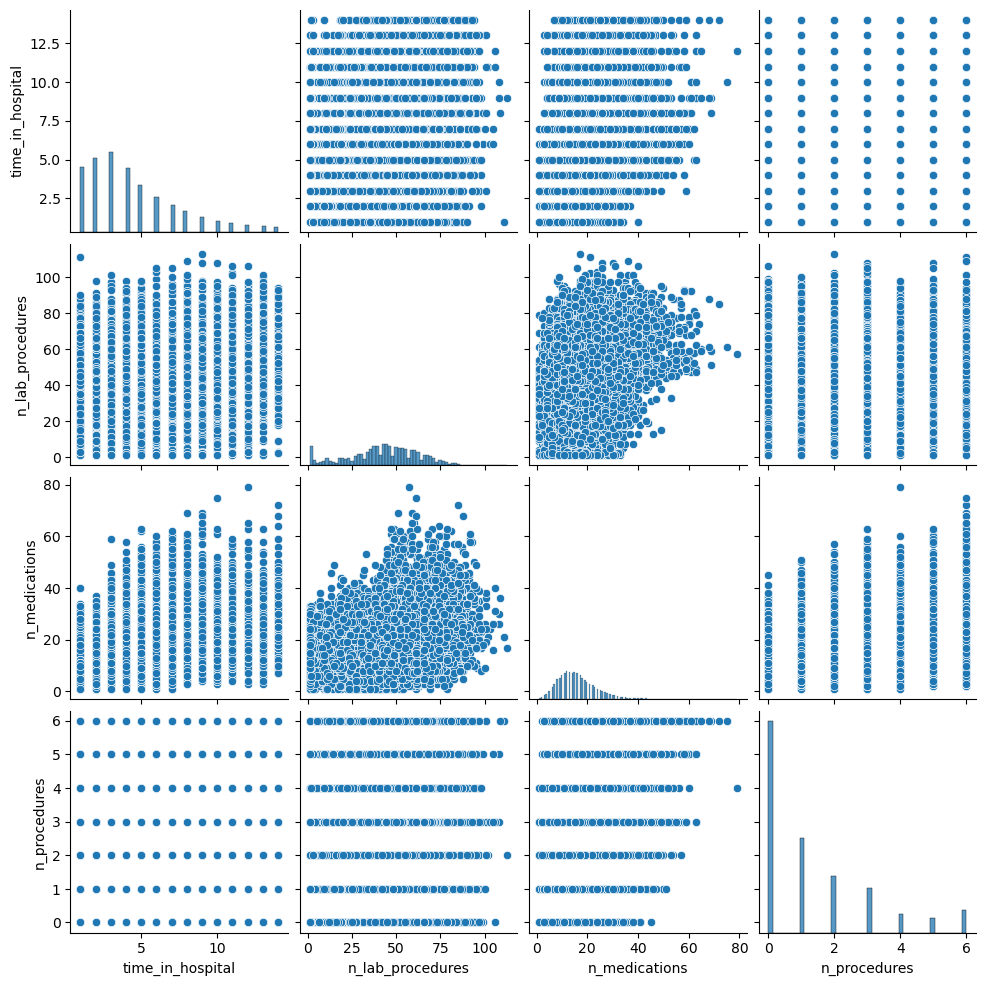

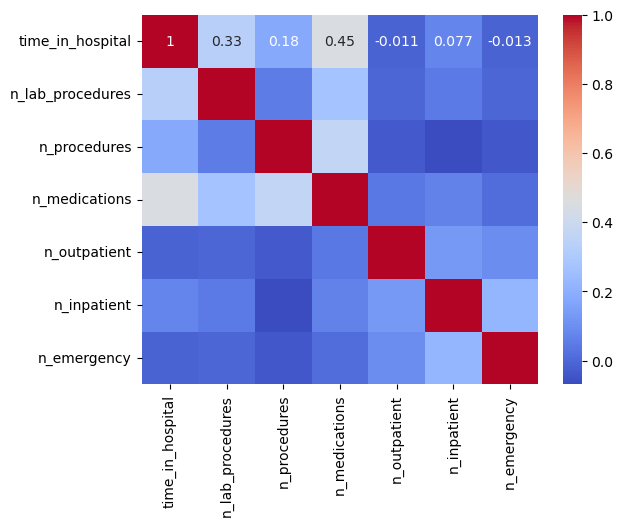

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df[['time_in_hospital', 'n_lab_procedures', 'n_medications', 'n_procedures']])
plt.show()

# Correlation Matrix and Heatmap
numeric_df = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.show()

the number of medications and  number of procedures tend to correlate to the time of stay in hospital , which makes sense

**1.4.Box plot of 'n_inpatient' vs. 'readmission_status'**

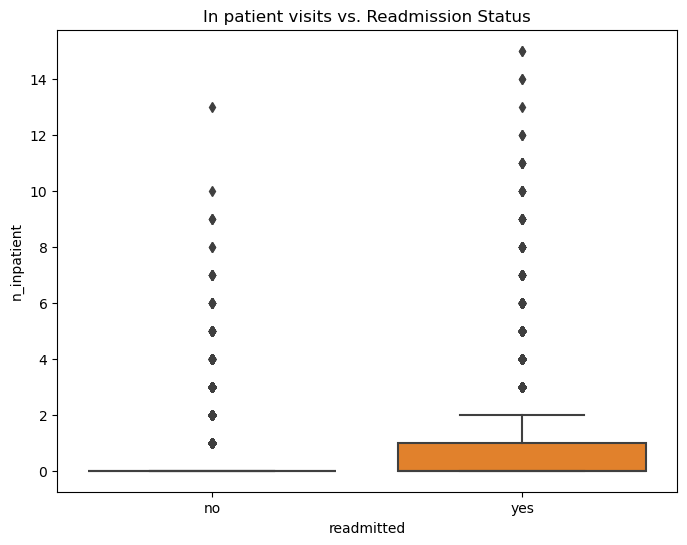

In [13]:
# Box plot of 'n_inpatient' vs. 'readmission_status'

plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='n_inpatient', data=df)
plt.title('In patient visits vs. Readmission Status')
plt.show()

In the boxplot above we can observe that, patients who had more in patient admission in the previous year tend to be readmitted within 30 days of discharge

**2. FEATURE ENGINEERING**

**2.1.Handling outliers**

After identifying columns with outliers, i decided to handle them by capping the outliers,
that will help in making the distribution more uniform.

In [14]:
# creating a list of columns with outliers
columns_with_outliers = [
    'time_in_hospital', 'n_lab_procedures', 'n_procedures',
    'n_medications', 'n_outpatient', 
    'n_inpatient', 'n_emergency'
]

#Capping the outliers at the 1st and 99th percentiles
for column in columns_with_outliers:
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Applying log transformation to the capped columns
# This will help in making the distribution more uniform and manageable for modeling

for column in columns_with_outliers:
    df[column] = np.log1p(df[column])  # np.log1p is used to handle zero values


I chose This Approach because it Preserves Data Integrity, Capping keeps the data within a realistic range without discarding potentially important cases.<br>

Reduces Skewness: Log transformation will help in making the distribution of the data more symmetric, which is beneficial for many modeling techniques.<br>

Applicable to Healthcare Data where extreme values often represent critical cases that should be included in the analysis, but they need to be handled carefully to avoid skewing the results

**2.2 Handling Missing values**

The medical specialty feature has so many missing data , in fact its a category(missing) on its as we dont know waht kind of of information it carry , we will have to drop it 

In [15]:
# Check for unique values to see the exact name of the category
print(df['medical_specialty'].unique())

# Strip any leading or trailing whitespace and convert to lower case for consistency
df['medical_specialty'] = df['medical_specialty'].str.strip().str.lower()

# Filter out rows where 'medical_specialty' is 'missing'
df = df[df['medical_specialty'] != 'missing']
print()
# Verify that the 'missing' category has been removed
print(df['medical_specialty'].unique())

['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']

['other' 'internalmedicine' 'family/generalpractice' 'cardiology'
 'surgery' 'emergency/trauma']


**2.3.Dropping columns**

For model simplicity and After Analysing my dataset i decided to drop the secondary and tertiary diagnosis as they are not so relevant to the target.

In [16]:
#Dropping the columns 'diag_2' and 'diag_3'
df.drop(columns = ['diag_2','diag_3'], inplace = True)

**2.4. Mapping and ordinally encoding categorical values**

Ordinally encoding the categorical features & Mapping them for the modelling.

In [17]:
age_mapping = {
    '[40-50)': 1,
    '[50-60)': 2,
    '[60-70)': 3,
    '[70-80)': 4,
    '[80-90)': 5,
    '[90-100)': 6
}
df['age'] = df['age'].map(age_mapping)


diabetes_med = {
    'no': 0,
    'yes': 1,
}
df['diabetes_med'] = df['diabetes_med'].map(diabetes_med)

readmitted = {
    'no': 0,
    'yes': 1,
}
df['readmitted'] = df['readmitted'].map(readmitted)


change = {
    'no': 0,
    'yes': 1,
}
df['change'] = df['change'].map(change)


**2.5.One-hot encoding multi-categorical features**

one hot encoding the features with multi- categories and drop the first column of each category to reduce multicolinearity, multicollinearity occurs when one predictor variable in a model can be linearly predicted from the others 

In [18]:
#One-hot encoding categorical variables
encoded_df = pd.get_dummies(df[['glucose_test', 'A1Ctest', 'diag_1','medical_specialty']], drop_first=True)

# Convert the boolean columns to binary (0/1)
encoded_df = encoded_df.astype(int)

# Drop the original columns that were encoded
df.drop(columns=['glucose_test', 'A1Ctest', 'diag_1','medical_specialty'], inplace=True)

#Merge the encoded columns back into the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

#Check the updated DataFrame
print(df.head())

   age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
1    4          1.386294          3.555348      1.098612       2.639057   
4    3          0.693147          3.761200      0.000000       2.079442   
7    3          0.693147          2.995732      1.945910       2.833213   
8    5          1.609438          4.219508      1.386294       2.639057   
9    4          2.197225          3.637586      0.693147       2.944439   

   n_outpatient  n_inpatient  n_emergency  change  diabetes_med  readmitted  \
1           0.0          0.0     0.000000       0             1           0   
4           0.0          0.0     0.000000       0             1           0   
7           0.0          0.0     0.693147       0             1           1   
8           0.0          0.0     0.000000       0             0           1   
9           0.0          0.0     0.000000       1             1           0   

   glucose_test_no  glucose_test_normal  A1Ctest_no  A1Ctest_normal  \
1  

**2.6.Standardization**

Next we are standardizing our columns for better modelling, Standardization will transform columns to have a mean of 0 and a standard deviation of 1. It’s useful when you want to bring all features onto the same scale without changing their range.

In [19]:
from sklearn.preprocessing import StandardScaler

# Exclude binary columns
numerical_columns_to_standardize = ['age','time_in_hospital', 'n_lab_procedures','n_procedures','n_inpatient','n_medications','n_outpatient','n_emergency']

#Apply StandardScaler
scaler = StandardScaler()
df[numerical_columns_to_standardize] = scaler.fit_transform(df[numerical_columns_to_standardize])

#Check the result
print(df.head())

        age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
1  0.523214         -0.313072         -0.064579      0.635905      -0.180105   
4 -0.233973         -1.590121          0.202853     -1.038464      -1.355640   
7 -0.233973         -1.590121         -0.791601      1.927251       0.227741   
8  1.280401          0.098046          0.798261      1.074354      -0.180105   
9  0.523214          1.180980          0.042260      0.017945       0.461383   

   n_outpatient  n_inpatient  n_emergency  change  diabetes_med  readmitted  \
1     -0.350827    -0.651645    -0.327620       0             1           0   
4     -0.350827    -0.651645    -0.327620       0             1           0   
7     -0.350827    -0.651645     2.128991       0             1           1   
8     -0.350827    -0.651645    -0.327620       0             0           1   
9     -0.350827    -0.651645    -0.327620       1             1           0   

   glucose_test_no  glucose_test_normal  A1C

Now lets plot a heatmap to see if , is there any new insights we can get from the numerical and standardized dataframe

/Users/tresornoel/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


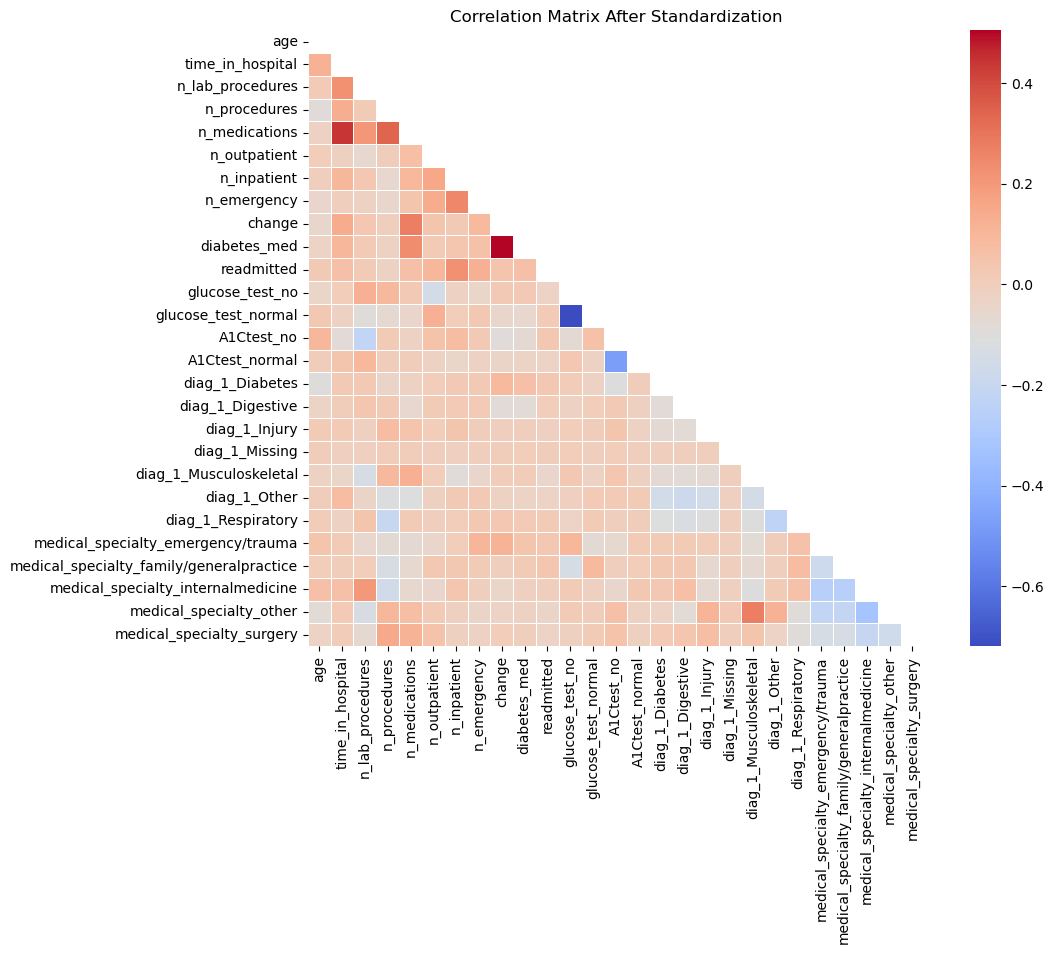

In [20]:
# Plot the heatmap for the standardized data
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix After Standardization')
plt.show()

Looking at the heatmap after standardization, we can see that people who had a change in diabetes medication tends to have more medication administered to them during their encounter.<br>and patient from internal medicine specialty tend to have more lab procedures

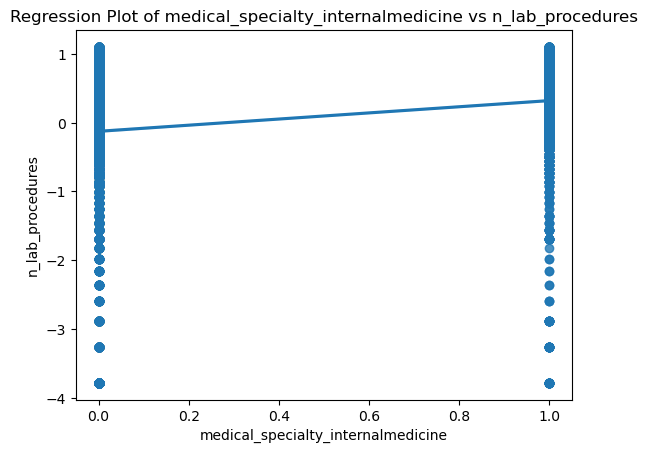

In [21]:
sns.regplot(x='medical_specialty_internalmedicine', y='n_lab_procedures', data=df)
plt.title('Regression Plot of medical_specialty_internalmedicine vs n_lab_procedures')
plt.xlabel('medical_specialty_internalmedicine')
plt.ylabel('n_lab_procedures')
plt.show()

A regression plot shows the relationship between two variables with a line of best fit,<br> The slope of the line indicates the strength and direction of the correlation.

**3. FEATURE SELECTION**

The feature selection methods I want to use SelectKBest with Mutual Information, Recursive Feature Elimination (RFE), and Feature Importance from Random Forest are well-suited to my hospital readmission dataset.<br> 
**SelectKBest**: Efficiently identifies top features by measuring their individual relevance to the target.
<br>**RFE: Recursive Feature Elimination**: Refines feature selection by considering interactions and removing redundant features.<br>
**Random Forest Importance**: Provides a robust, model-driven approach to understanding feature relevance.
<br>
<br>
After using all the 3 methods i will find the intersection(features that appear in all 3 methods) and use them

**3.1.SelectKBest**

In [23]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

#X is my feature set and y is the target variable
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# top 10 features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top 10 Features by Mutual Information:", selected_features)

Top 10 Features by Mutual Information: Index(['time_in_hospital', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'diabetes_med', 'glucose_test_no', 'A1Ctest_normal', 'diag_1_Other',
       'medical_specialty_emergency/trauma', 'medical_specialty_other'],
      dtype='object')


**3.2.RFE: Recursive Feature Elimination**

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#RFE with a Random Forest model to select the top 10 features

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_new, y)
rfe_selected_features = selected_features[rfe.get_support()]

print("Features Selected by RFE:", rfe_selected_features)

Features Selected by RFE: Index(['time_in_hospital', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'diabetes_med', 'glucose_test_no', 'A1Ctest_normal', 'diag_1_Other',
       'medical_specialty_emergency/trauma', 'medical_specialty_other'],
      dtype='object')


**3.3.Feature Importance from Random Forest**

In [25]:
# Train a Random Forest model and get feature importances

model.fit(X, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Features by Random Forest Importance:", top_features)

Top 10 Features by Random Forest Importance:              Feature  Importance
2   n_lab_procedures    0.198064
4      n_medications    0.171193
1   time_in_hospital    0.114917
0                age    0.086404
3       n_procedures    0.080963
6        n_inpatient    0.062286
5       n_outpatient    0.024499
8             change    0.023887
19      diag_1_Other    0.022427
7        n_emergency    0.021026


After using all the 3 methods above and looking at the intersection features (the features that appeared in all three of your feature selection methods SelectKBest, RFE, Random Forest), <br>i realised that the intersection features have a low importance score in the Random forest importance method, which may raise a bit of conflict, <br>so i decided to opt for a hybrid method where i will select the intersection features and top up with the features with High score of importance

**3.4.Implement the hybrid approach**

In [26]:
#combining the intersection features
combined_features = ['n_emergency','n_inpatient','n_outpatient','n_lab_procedures','n_medications','time_in_hospital','age','change']

#printing the features
print(f'combined_features : {combined_features}')


combined_features : ['n_emergency', 'n_inpatient', 'n_outpatient', 'n_lab_procedures', 'n_medications', 'time_in_hospital', 'age', 'change']


**4.MODELLING**

In [28]:
#subsetting the new features in the dataset
X = X[combined_features]

#checking X and y shape
print(X)
print(X.shape)
print(y)
print(y.shape)

       n_emergency  n_inpatient  n_outpatient  n_lab_procedures  \
1        -0.327620    -0.651645     -0.350827         -0.064579   
4        -0.327620    -0.651645     -0.350827          0.202853   
7         2.128991    -0.651645     -0.350827         -0.791601   
8        -0.327620    -0.651645     -0.350827          0.798261   
9        -0.327620    -0.651645     -0.350827          0.042260   
...            ...          ...           ...               ...   
24983    -0.327620    -0.651645     -0.350827          0.202853   
24989    -0.327620    -0.651645     -0.350827          0.372548   
24990    -0.327620    -0.651645     -0.350827         -1.081497   
24992    -0.327620    -0.651645     -0.350827         -0.027981   
24998    -0.327620    -0.651645     -0.350827          0.678255   

       n_medications  time_in_hospital       age  change  
1          -0.180105         -0.313072  0.523214       0  
4          -1.355640         -1.590121 -0.233973       0  
7           0.2277

**4.1. Initial model selection**

In my modelling i chose to use two models : Logistic regression and Gradient Boosting , i explored multiple models to ensure robust and accurate predictions.<br> 
**Logistic regression**achieved an AUC-ROC of 0.613, indicating that it **performed well** compared to ther models in predicting readmission , for its **interpretability** and **simplicity**.<br> On the other hand Gradient boosting performed slightly better than Logistic regression, and it model complex interactions in my dataset. 

In [29]:
# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression AUC:", roc_auc_score(y_test, y_pred_logreg))


# Gradient Boosting (e.g., XGBoost)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting AUC:", roc_auc_score(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.6137083993660856
Logistic Regression AUC: 0.5966032446108347
Gradient Boosting Accuracy: 0.6160855784469097
Gradient Boosting AUC: 0.5988547054328206


Because the difference between the Logistic Regression and Gradient boostiong is not high, i decided to implement the Logistic regression because it balances strong performance with clear explanations.

**4.2.Logistic regression implementation**

In [30]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]


**4.3. Evaluation metrics**

In [31]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.6137
AUC-ROC: 0.6343


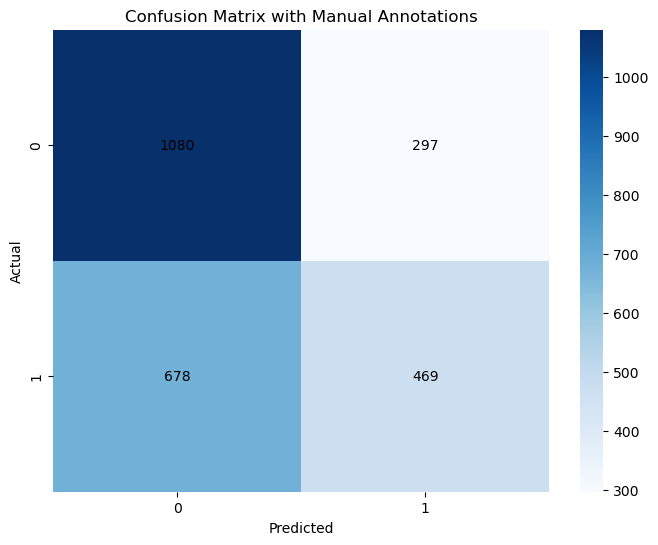

True Negatives (TN): 1080
False Positives (FP): 297
False Negatives (FN): 678
True Positives (TP): 469


In [32]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, cmap='Blues', cbar=True, annot=False)  # Turn off automatic annotation

#annotate the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', color='black', ha='center', va='center')

plt.title('Confusion Matrix with Manual Annotations')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Manually extract and print out the values
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

**True Negatives (1080 cases):** Correct predictions of the negative class (no readmission).<br>
**False Positives (297 cases ):** Incorrect predictions of the positive class when the actual class was negative.<br>
**True positives (469 cases):** Correct predictions of the positive class (readmission).<br>
**False negatives (678 cases):** Incorrect predictions of the negative class when the actual class was positive.

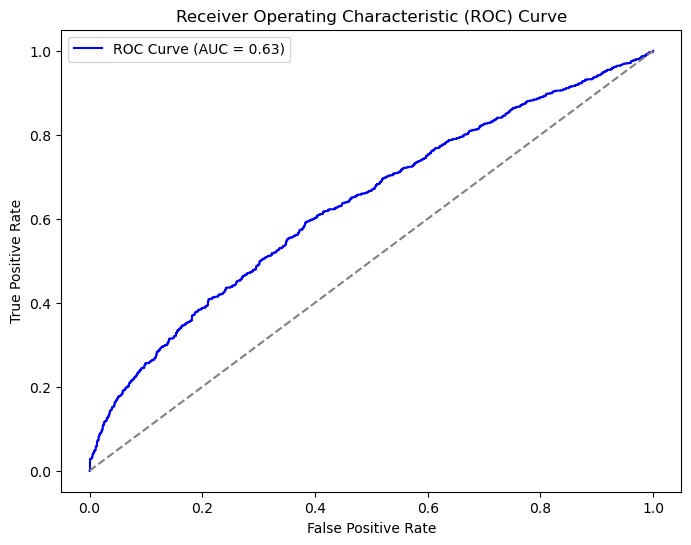

In [33]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

            Feature  Coefficient  Absolute Coefficient
1       n_inpatient     0.414994              0.414994
0       n_emergency     0.149224              0.149224
7            change     0.139400              0.139400
2      n_outpatient     0.129860              0.129860
5  time_in_hospital     0.046128              0.046128
6               age     0.043822              0.043822
4     n_medications     0.036406              0.036406
3  n_lab_procedures     0.025823              0.025823


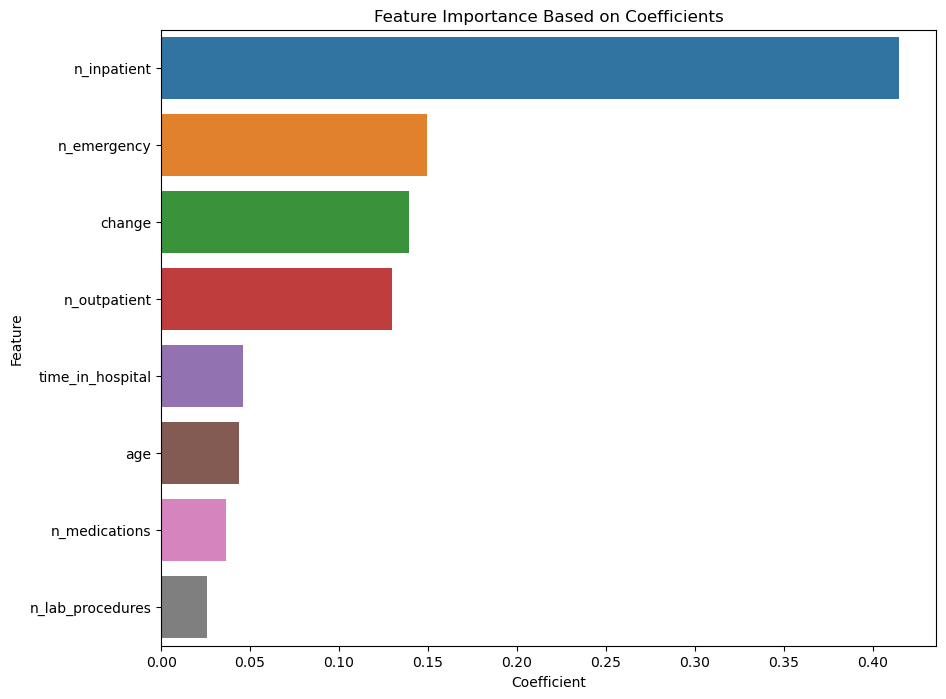

In [34]:
# Get the coefficients and feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute value of the coefficient to see most important features
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance Based on Coefficients')
plt.show()

the coefficients highlight the imporatance of each feature, as seen when performing EDA number of inpatient visits in the previous year , determines if a patients will likely be readmitted in less than 30 days after being discharged, <br>the number of emergency visits, the change in medication and number of outpatients visits can also influence the patient readmission.

**4.4. Predict new patient outcome**

Let's assume we have a new patient with the following features 	**n_emergency: 1**, <br>
    **n_inpatient: 2**,<br>
    **n_outpatient: 0**,<br>
    **n_lab_procedures: 40**,<br>
    **n_medications: 10**,<br>
    **time_in_hospital: 5**,<br>
	**age: 3 (assuming 3 represents the [40-50] age category)**<br>
	**change: 1** (indicating a change in medication)<br>
  
And we want to predict if this new patient will be readmitted or not within 30 days of discharge.

In [35]:

# Defining the features and their corresponding values for the new patient
new_patient_data = {
    'n_emergency': 1,
    'n_inpatient': 2,
    'n_outpatient': 0,
    'n_lab_procedures': 40,
    'n_medications': 10,
    'time_in_hospital': 5,
    'age': 3,  # assuming 3 represents the [40-50] age category
    'change': 1
}

# Convert this dictionary into a DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

# Predict the probability of readmission for the new patient
predicted_prob = logreg.predict_proba(new_patient_df)[0, 1]

# Predict the class (0 = Not Readmitted, 1 = Readmitted)
predicted_class = logreg.predict(new_patient_df)[0]

# print the results
print(f"Predicted Probability of Readmission: {predicted_prob:.2f}")
print(f"Predicted Class: {'Readmitted' if predicted_class == 1 else 'Not Readmitted'}")

Predicted Probability of Readmission: 0.93
Predicted Class: Readmitted


**Predicted Probability (predicted_prob):**<br>
This value represents the probability that the patient will be readmitted. For example, if the predicted probability is 0.93, it means the model estimates a 93% chance of readmission.<br>
**Predicted Class (predicted_class):**<br>
This is the binary outcome of the model. If the probability exceeds the default threshold of 0.5, the model predicts the class as 1 (readmitted). Otherwise, it predicts 0 (not readmitted).

**5. CONCLUSION**

In conclusion, an AUC-ROC score of 0.6343 indicates that my model is better than random guessing (which would have an AUC-ROC of 0.5) but still leaves room for improvement.

**THANK YOU!!**